# This notebook has the plotting codes; use fitting_na_16.ipynb to run optimizations

In [1]:
import numpy as np
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats
import curve_fitting as cf
import generalized_genSim_shorten_time as ggsd
import pickle
import time
import json
from deap import tools
import multiprocessing
import eval_helper_na12 as eh16

In [2]:
eh16.set_channel("na12")

In [3]:
import json
with open('./csv_files/mutants_parameters.txt') as f:
    data = f.read()
    js = json.loads(data)
#js['A_wt']

In [4]:
# adjust parameters here

param_range_file = "./csv_files/param_stats_wide_na12.csv"
mutant_name = "adultWT"
mutant_protocol_csv_name = './csv_files/mutant_protocols_CHOP.csv'
get_baseline_param_fn = eh16.get_wt_params_adultWT()

In [5]:
# just set parameters here, then simply click through to get a dictionary of parameters as well as plots
new_par = [29.37455303390747, -57.73385584119139, 11.891550446498853, 0.7034480970709812, 0.7458471676703804, -76.54492828977375, -4.360135868594882, 1.0753187187691573, 7.743820332718601, 0.4342886254656672, 0.42061600443361485, 1.8527146017814786, 0.17671265620260843, 0.04089488556627415, -37.52777117761381, 4.1662221609375685, -104.4691271236539, 0.05585446125335954, 29.571131958843388, 2.5137334884656872, 56.76570675176218, -116.41680866340164, -6.558415415201545, 48.5320376591091]
p1 = [35.336491999433214, -62.922265018227336, 6.653227770670037, 1.6085194858985032, 1.9610096541498063, -25.131096837653246, -32.726622036137094, 7.4088907890561, 6.087139449301829, 0.04977262720771908, 0.34972666166850597, 8.285176002785123, 0.012852797938524651, 0.02881186435129404, -48.48440841793984, 7.760131602919982, -34.078061414435986, 0.08584137995548408, 79.9573778064748, 1.2622891269923364, 72.38254906735173, -72.65001663340412, 40.10652134477391, 49.56803729217332]
p2 = [34.77892981139749, -66.294037045769, 5.464496811869247, 0.40864335731830415, 1.2310650727729024, -38.882921895537066, -26.469465264992433, 11.531764640824356, 15.279427585419953, 0.32363023807355973, 0.1789145675474932, 3.013863582830406, 0.0349184767215889, 0.0704759163706076, -48.554822018185995, 5.4312120309698, -118.60287032280878, 0.08074950606428268, 77.52593734791336, 2.1617046645599003, 121.88551526010346, -31.957029577792174, 52.74536297526896, 52.09356813604149]

new_par = p2

In [6]:
# use this to make a dictionary out of the parameters
eh16.make_params_dict(new_par)

{'sh_na12': 34.77892981139749,
 'tha_na12': -66.294037045769,
 'qa_na12': 5.464496811869247,
 'Ra_na12': 0.40864335731830415,
 'Rb_na12': 1.2310650727729024,
 'thi1_na12': -38.882921895537066,
 'thi2_na12': -26.469465264992433,
 'qd_na12': 11.531764640824356,
 'qg_na12': 15.279427585419953,
 'mmin_na12': 0.32363023807355973,
 'hmin_na12': 0.1789145675474932,
 'q10_na12': 3.013863582830406,
 'Rg_na12': 0.0349184767215889,
 'Rd_na12': 0.0704759163706076,
 'thinf_na12': -48.554822018185995,
 'qinf_na12': 5.4312120309698,
 'vhalfs_na12': -118.60287032280878,
 'a0s_na12': 0.08074950606428268,
 'zetas_na12': 77.52593734791336,
 'gms_na12': 2.1617046645599003,
 'smax_na12': 121.88551526010346,
 'vvh_na12': -31.957029577792174,
 'vvs_na12': 52.74536297526896,
 'Ena_na12': 52.09356813604149}

In [7]:
get_baseline_param_fn

[35.336491999433214,
 -62.922265018227336,
 6.653227770670037,
 1.6085194858985032,
 1.9610096541498063,
 -25.131096837653246,
 -32.726622036137094,
 7.4088907890561,
 6.087139449301829,
 0.04977262720771908,
 0.34972666166850597,
 8.285176002785123,
 0.012852797938524651,
 0.02881186435129404,
 -48.48440841793984,
 7.760131602919982,
 -34.078061414435986,
 0.08584137995548408,
 79.9573778064748,
 1.2622891269923364,
 72.38254906735173,
 -72.65001663340412,
 40.10652134477391,
 49.56803729217332]

(actual, goal)
activation v half: (0.0799999999999983, 0.0)
activation slope: (0.8568588469184889, 1.0)


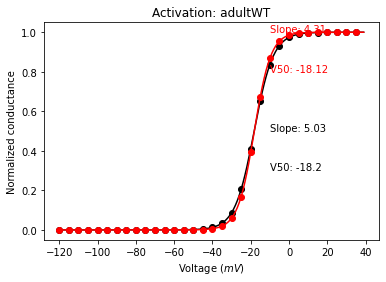

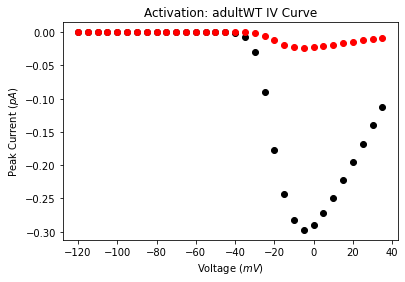

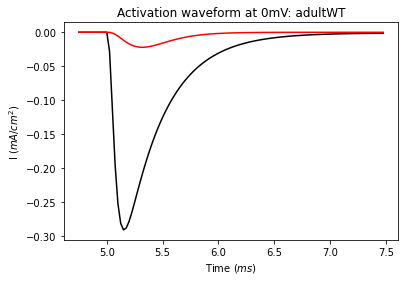

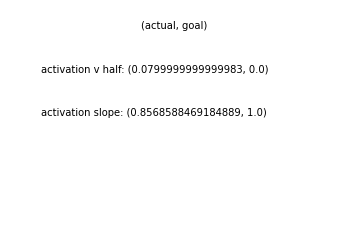

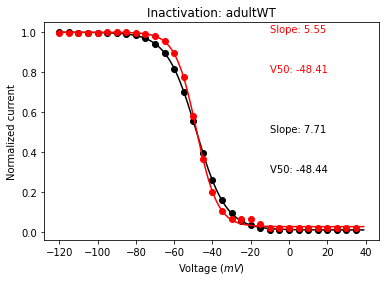

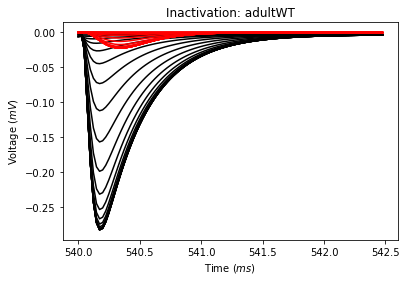

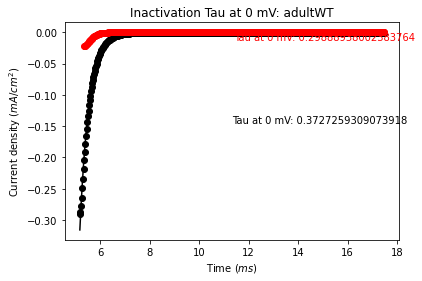

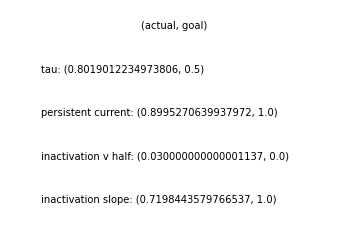

In [8]:
# makes individual plots, and saves the plots as a pdf file to "filename"
eh16.make_act_plots(new_par, mutant_name, mutant_protocol_csv_name, param_values_wt = get_baseline_param_fn, filename = './Plots_Folder/jinan_act.pdf')
eh16.make_inact_plots(new_par, mutant_name, mutant_protocol_csv_name, param_values_wt = get_baseline_param_fn, filename = './Plots_Folder/jinan_inact.pdf')

In [9]:
wt_inact = ggsd.Inactivation(channel_name = 'na12')
wt_inact.genInactivation()

print(wt_inact.v_vec)
print(wt_inact.ipeak_vec)

[-120 -115 -110 -105 -100  -95  -90  -85  -80  -75  -70  -65  -60  -55
  -50  -45  -40  -35  -30  -25  -20  -15  -10   -5    0    5   10   15
   20   25   30   35]
[-0.27127976230719714, -0.27136019279269097, -0.27139359126184315, -0.2713423258994153, -0.2711373489082475, -0.27065247450756313, -0.26965875169810205, -0.2677462257212511, -0.2641985562600116, -0.25781976243906146, -0.24677832284611875, -0.2287127992896136, -0.2015984334734076, -0.1656723517480197, -0.1251357586728385, -0.08685725719202385, -0.056252506235685985, -0.03478222380438569, -0.021378940481373974, -0.013056028099992935, -0.008083531300889969, -0.005204227904167351, -0.003157016947791707, -0.00315701694688603, -0.003157016946886032, -0.003157016946886036, -0.00315701694688603, -0.003157016946886035, -0.0031570169468860335, -0.003157016946886032, -0.0031570169468860317, -0.0031570169468860313]


In [10]:
wt_act = ggsd.Activation(channel_name = 'na12')
wt_act.L

32